<a href="https://colab.research.google.com/github/Pipickin/Tensorflow/blob/main/Images/Augmentation_Example/fashion_MNIST_with_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
# import tensorflow to create a model
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
# we apply a preprocessing which called ImageDataGenerator to reduce over-fitting
# thit technique known as Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train, X_test = X_train/255., X_test/255.
print('shape of X_train before reshape: ', X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
print('shape of X_train after reshape: ', X_train.shape)

shape of X_train before reshape:  (60000, 28, 28)
shape of X_train after reshape:  (60000, 28, 28, 1)


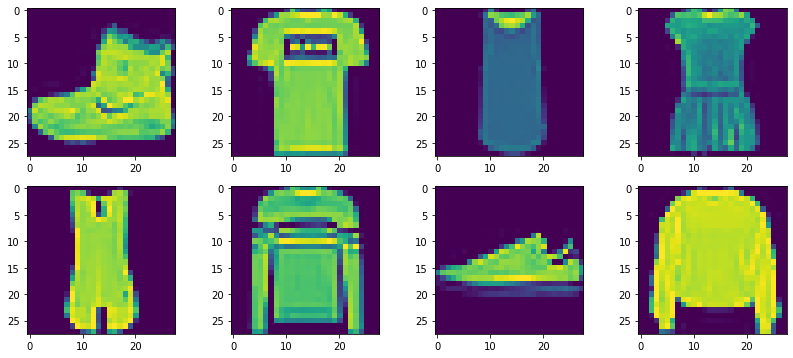

In [ ]:
# let's take a look at our images
_, axes = plt.subplots(2,4, figsize = (14,6))
for ax, image in zip(axes.ravel(), X_train[:,:,:,0]):
  ax.imshow(image)

In [ ]:
model = tf.keras.Sequential([layers.Conv2D(32, (3,3), input_shape = (28,28,1), padding='same', activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.Conv2D(32, (3,3), padding='same', activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.MaxPool2D((2,2)),
                             layers.Conv2D(64, (3,3), activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.Conv2D(64,(3,3), activation = 'relu'),
                             layers.BatchNormalization(),
                             layers.MaxPool2D((2,2)),
                             layers.Flatten(),
                             layers.Dense(52, activation='relu'),
                             layers.BatchNormalization(),
                             layers.Dense(10, activation='softmax')])
                             
                             #layers.Flatten(),
                             #layers.Dense(128, activation = tf.keras.activations.relu),
                             #layers.Dense(10,activation = tf.keras.activations.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        2

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = tf.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

train_generator = gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

303

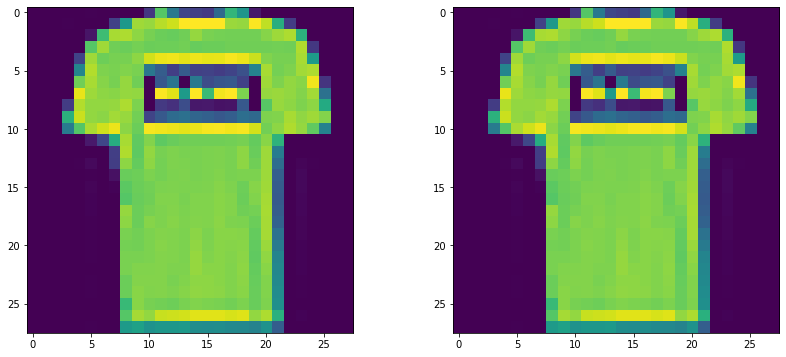

In [ ]:
_, axes_dif = plt.subplots(1,2, figsize = (14,6))

axes_dif[0].imshow(X_train[1,:,:,0])
axes_dif[1].imshow(train_generator.x[1,:,:,0])

sum(sum(X_train[1,:,:,0]==train_generator.x[1,:,:,0]))

In [ ]:
sum(sum(X_train[1,:,:,0]==X_train[1,:,:,0]))

784

In [ ]:
print(X_train[1,5,10,0])
print(train_generator.x[1,5,10,0])

0.396078431372549
0.39607844


In [ ]:
train_generator.x_misc

[]

In [ ]:
model.fit(train_generator, epochs=5)

Epoch 1/5
938/938 [==============================] - 235s 250ms/step - loss: 0.4226 - accuracy: 0.8445
Epoch 2/5
938/938 [==============================] - 234s 249ms/step - loss: 0.3318 - accuracy: 0.8777
Epoch 3/5
938/938 [==============================] - 237s 252ms/step - loss: 0.2938 - accuracy: 0.8930
Epoch 4/5
938/938 [==============================] - 238s 253ms/step - loss: 0.2753 - accuracy: 0.8990
Epoch 5/5
938/938 [==============================] - 242s 258ms/step - loss: 0.2570 - accuracy: 0.9058


In [ ]:
model.evaluate(test_generator)

157/157 [==============================] - 9s 57ms/step - loss: 0.2624 - accuracy: 0.9058


[0.26244890689849854, 0.9057999849319458]